<a href="https://colab.research.google.com/github/venky9885/ML_Linear_Regression/blob/main/Ml_first_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df = pd.DataFrame(df)

In [217]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [218]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


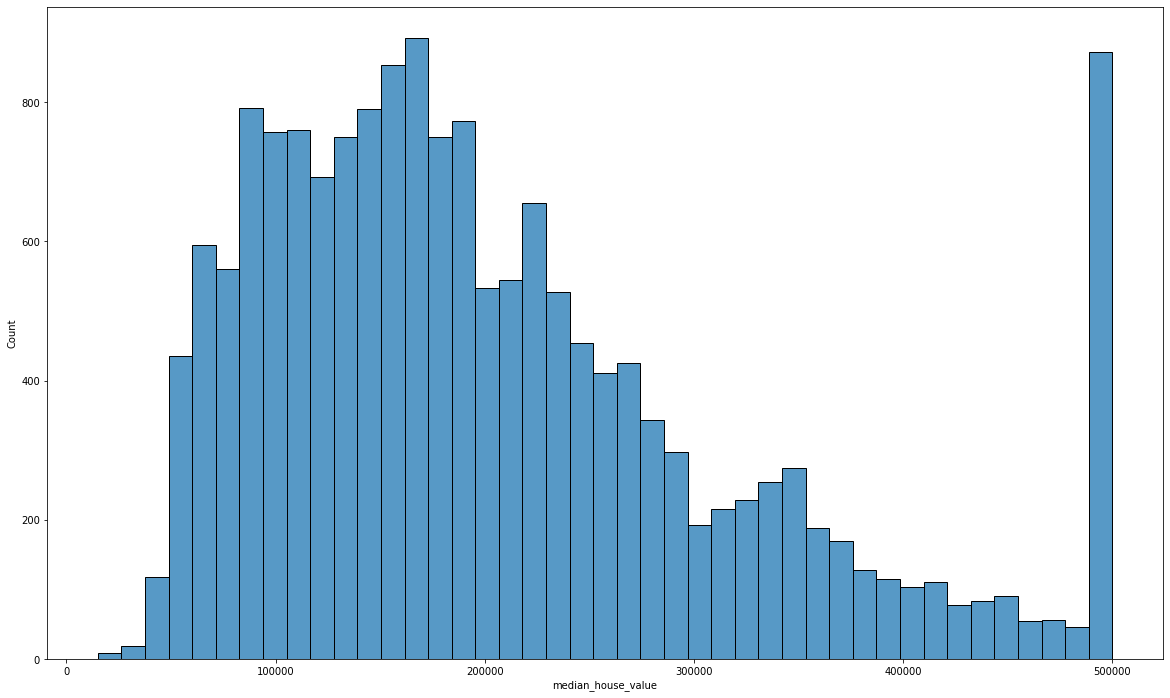

In [219]:
plt.figure(figsize=(20,12))
sns.histplot(data=df['median_house_value'])

In [220]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [221]:
X = df[[ 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       ]]

In [222]:
y = df['median_house_value']

#y = df.loc['median_house_value']

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [225]:
y_test =  pd.DataFrame(y_test).reset_index()
y_test.drop('index',axis=1,inplace=True)
y_test.head()

,median_house_value
0,158400.0
1,500001.0
2,239300.0
3,120800.0
4,72100.0


In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
lg = LinearRegression()

In [228]:
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
pred = lg.predict(X_test)

In [230]:
from sklearn import metrics
import numpy as np

In [231]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 55240.03069469435
MSE: 5791669343.964667
RMSE: 76103.01796883398


In [232]:
#plt.figure(figsize=(20,12))
#sns.distplot((y_test-pred),bins=50,color='red');
#sns.jointplot(x='total_bill',y='tip',,kind='scatter')

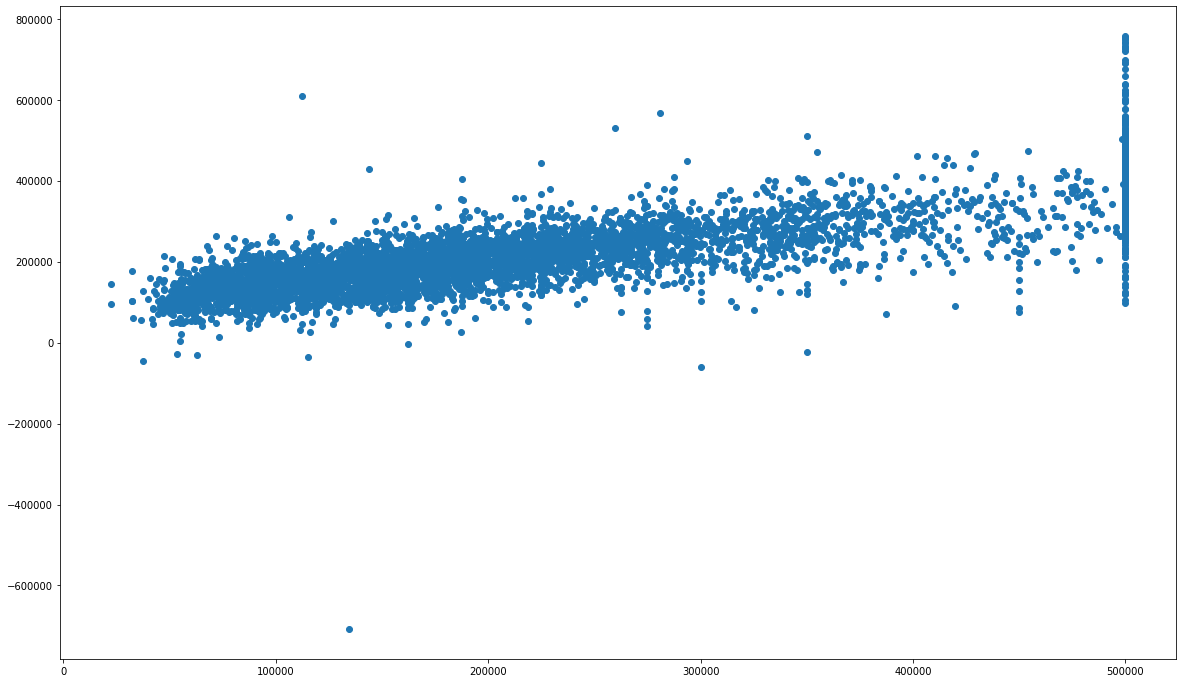

In [233]:
plt.figure(figsize=(20,12))
plt.scatter(y_test,pred)

In [234]:
pred = pd.DataFrame(pred,columns=['pred']).dropna().reset_index()
pred.drop('index',axis=1,inplace=True)
pred.head()

,pred
0,208897.498612
1,494230.307366
2,133683.647691
3,146222.611300
4,186250.058538


In [235]:
# y_test = pd.DataFrame(y_test,columns=['y_true']).dropna().reset_index()
# y_test.drop('index',axis=1,inplace=True)
# y_test.head()
#y_test.isna().sum()
 #df.isna().sum()
y_test

,median_house_value
0,158400.0
1,500001.0
2,239300.0
3,120800.0
4,72100.0
...,...
5095,155500.0
5096,410400.0
5097,199700.0
5098,112200.0


In [236]:
 predy = pd.concat([pred,y_test],axis=1)
 predy.head()

,pred,median_house_value
0,208897.498612,158400.0
1,494230.307366,500001.0
2,133683.647691,239300.0
3,146222.611300,120800.0
4,186250.058538,72100.0


<Figure size 2160x1440 with 0 Axes>

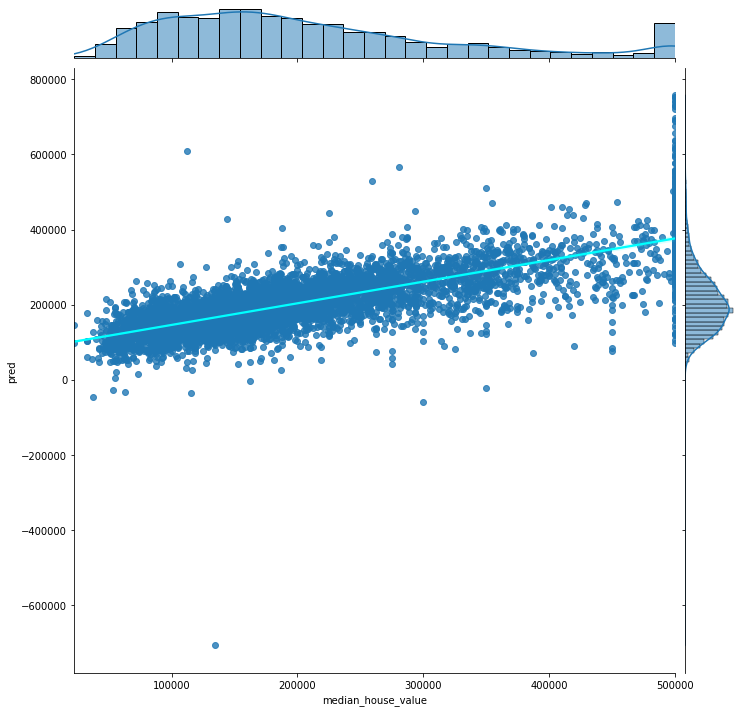

In [237]:
plt.figure(figsize=(30,20))
sns.jointplot(x='median_house_value',y='pred',data=predy,kind='reg',height=10,ratio=10,joint_kws={'line_kws':{'color':'cyan'}})